***Developing an interactive dashboard to optimize worker scheduling in a warehouse. Using tools like Plotly and IPython widgets in Google Colab, the dashboard visualizes worker allocation across shifts and explores constraints like shift coverage and overtime management to enhance operational efficiency.***

---



 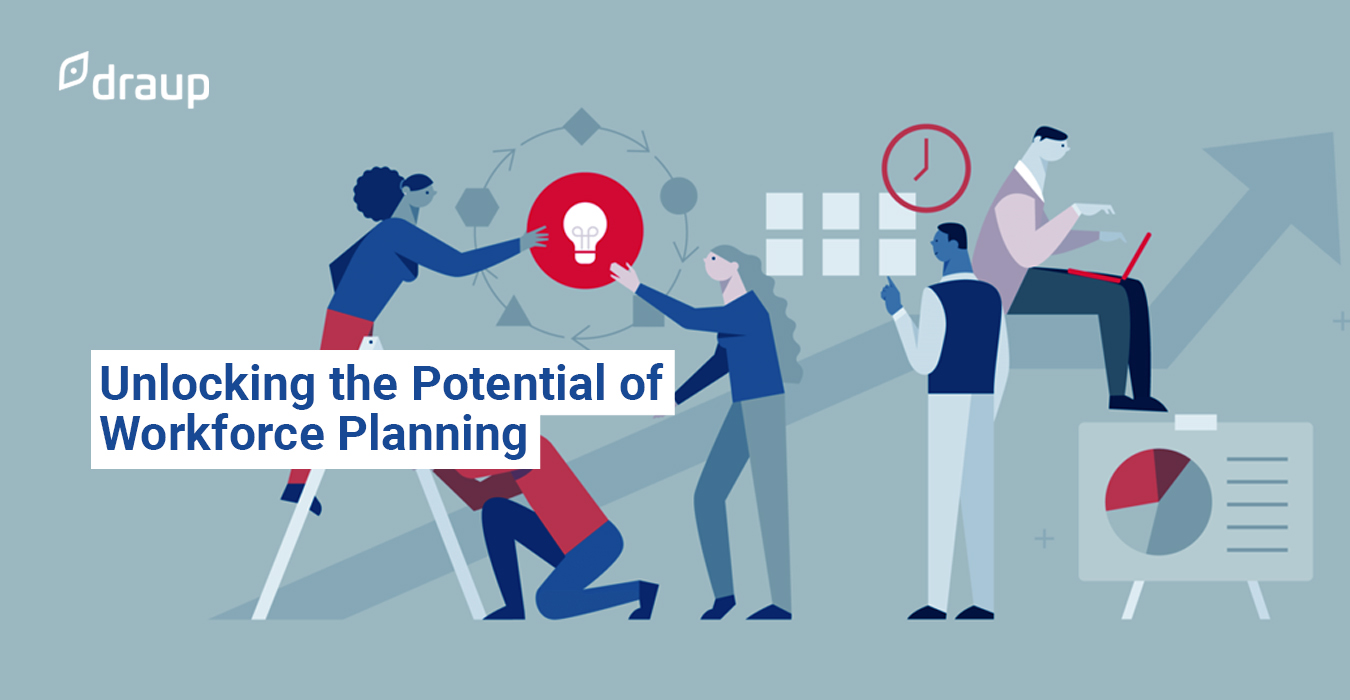


---



# **`Importing Libraries`**



In [3]:
import pandas as pd

# **`I. Data Preparation`**




In [4]:
workers_data = {
    'WorkerID': [1, 2, 3, 4, 5],
    'SkillLevel': [3, 4, 2, 5, 1],
    'WageRate': [15, 20, 10, 25, 18],
    'MaxShiftsPerWeek': [5, 4, 6, 5, 3],
    'WeekendAvailability': [1, 0, 1, 1, 0],
    'Seniority': [5, 3, 2, 4, 1],
    'OvertimeLimit': [8, 6, 10, 7, 5]
}

shifts_data = {
    'ShiftID': [1, 2, 3, 4, 5],
    'SkillRequired': [2, 4, 3, 5, 1],
    'ShiftLength': [8, 8, 8, 8, 8],
    'WeekendShift': [0, 1, 0, 1, 0],
    'WorkerRequired': [3, 2, 4, 3, 2]
}

In [5]:
workers_df = pd.DataFrame(workers_data)
shifts_df = pd.DataFrame(shifts_data)

In [6]:
workers_df

,WorkerID,SkillLevel,WageRate,MaxShiftsPerWeek,WeekendAvailability,Seniority,OvertimeLimit
0,1,3,15,5,1,5,8
1,2,4,20,4,0,3,6
2,3,2,10,6,1,2,10
3,4,5,25,5,1,4,7
4,5,1,18,3,0,1,5


# **`II. Problem Formulation`**

In [ ]:
from pulp import *

In [9]:
# Create the LP problem instance
problem = LpProblem("Worker_Scheduling", LpMaximize)

# Decision variables
x = LpVariable.dicts("worker_shift", [(i, j) for i in workers_df['WorkerID'] for j in shifts_df['ShiftID']], cat="Binary")

# Objective function: Minimize the total wage cost
problem += lpSum([x[i, j] * workers_df.loc[i-1, 'WageRate'] for i in workers_df['WorkerID'] for j in shifts_df['ShiftID']])

# Add constraints for worker schedules
for i in workers_df['WorkerID']:
    problem += lpSum([x[i, j] for j in shifts_df['ShiftID']]) <= workers_df.loc[i-1, 'MaxShiftsPerWeek']

# Add constraints for skill matching
for j in shifts_df['ShiftID']:
    required_skill = shifts_df.loc[j-1, 'SkillRequired']
    problem += lpSum([x[i, j] for i in workers_df[workers_df['SkillLevel'] >= required_skill]['WorkerID']]) >= shifts_df.loc[j-1, 'WorkerRequired']

# More constraints can be added as needed

# Solve the problem
problem.solve()

-1

# **`III. Solution and Analysis`**

In [11]:
for i in workers_df['WorkerID']:
    for j in shifts_df['ShiftID']:
        if x[i, j].varValue:
            print(f"Worker {i} assigned to Shift {j}")

Worker 1 assigned to Shift 1
Worker 1 assigned to Shift 2
Worker 1 assigned to Shift 3
Worker 1 assigned to Shift 4
Worker 1 assigned to Shift 5
Worker 2 assigned to Shift 1
Worker 2 assigned to Shift 2
Worker 2 assigned to Shift 3
Worker 2 assigned to Shift 4
Worker 2 assigned to Shift 5
Worker 3 assigned to Shift 1
Worker 3 assigned to Shift 2
Worker 3 assigned to Shift 3
Worker 3 assigned to Shift 4
Worker 3 assigned to Shift 5
Worker 4 assigned to Shift 1
Worker 4 assigned to Shift 2
Worker 4 assigned to Shift 3
Worker 4 assigned to Shift 4
Worker 4 assigned to Shift 5
Worker 5 assigned to Shift 1
Worker 5 assigned to Shift 2
Worker 5 assigned to Shift 4


# **`IV. Streamlit Dashboard`**

In [ ]:
import streamlit as st

In [14]:
st.title("Worker Scheduling Optimization")

# Collect inputs from the user
num_workers = st.slider("Number of Workers", 1, 20, 5)
num_shifts = st.slider("Number of Shifts", 1, 10, 5)

# Create a sample dataset based on user input
workers_df = pd.DataFrame({
    'WorkerID': range(1, num_workers + 1),
    'SkillLevel': [3] * num_workers,
    'WageRate': [15] * num_workers,
    'MaxShiftsPerWeek': [5] * num_workers,
    'WeekendAvailability': [1] * num_workers,
    'Seniority': [1] * num_workers,
    'OvertimeLimit': [10] * num_workers
})

shifts_df = pd.DataFrame({
    'ShiftID': range(1, num_shifts + 1),
    'SkillRequired': [2] * num_shifts,
    'ShiftLength': [8] * num_shifts,
    'WeekendShift': [0] * num_shifts,
    'WorkerRequired': [3] * num_shifts
})

# Optimization logic goes here...

# Display the results
st.write("Optimized Worker Schedule")

# Display the schedule in a table or a visual format

2024-08-25 13:49:27.301 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


# **`V. ipywidgets`**

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [27]:
# Sample data and simple output function
shifts = ["Shift 1", "Shift 2", "Shift 3", "Shift 4"]
workers = [5, 8, 6, 7]

def show_shift_details(shift):
    idx = shifts.index(shift)
    print(f"{shift}: {workers[idx]} workers assigned.")

# Dropdown widget
shift_dropdown = widgets.Dropdown(
    options=shifts,
    value=shifts[0],
    description='Select Shift:',
)

# Display dropdown and bind function
display(shift_dropdown)
shift_dropdown.observe(lambda change: show_shift_details(change['new']), names='value')


Dropdown(description='Select Shift:', options=('Shift 1', 'Shift 2', 'Shift 3', 'Shift 4'), value='Shift 1')

Shift 3: 6 workers assigned.
Shift 4: 7 workers assigned.
Shift 2: 8 workers assigned.


# **`VI. Plotly`**

In [1]:
import plotly.express as px

In [29]:
# Sample data
df = pd.DataFrame({
    "Shifts": ["Shift 1", "Shift 2", "Shift 3", "Shift 4"],
    "Workers": [5, 8, 6, 7],
    "OvertimeHours": [2, 1, 3, 2]
})

# Create an interactive bar chart
fig = px.bar(df, x="Shifts", y="Workers", title="Number of Workers per Shift")
fig.show()

# Another example for overtime
fig_overtime = px.line(df, x="Shifts", y="OvertimeHours", title="Overtime Hours per Shift")
fig_overtime.show()